In [1]:
import pandas as pd 


In [21]:
colums = ['building_size', 'construction_year', 'land_size', 'description', 'cat2_slug', 'cat3_slug']
df = pd.read_csv(r'C:\Users\rezaei\OneDrive\Documents\Bootcamp\pro\Divar.csv', usecols=colums)

In [23]:
df.head(10)

,cat2_slug,cat3_slug,description,land_size,building_size,construction_year
0,temporary-rent,villa,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,NaN,500.0,NaN
1,residential-sell,apartment-sell,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,NaN,60.0,۱۳۸۴
2,residential-rent,apartment-rent,تخلیه پایان ماه,NaN,132.0,۱۴۰۱
3,commercial-rent,office-rent,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,NaN,90.0,۱۴۰۰
4,residential-sell,apartment-sell,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,NaN,115.0,۱۴۰۳
5,residential-rent,apartment-rent,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,NaN,100.0,۱۳۸۹
6,commercial-rent,office-rent,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,NaN,80.0,۱۳۹۵
7,residential-sell,apartment-sell,♡♡♡♡♡♡بنام خدا♡♡♡♡♡♡\n♡♡♡عرض ادب واحترام♡♡♡\n♡...,NaN,100.0,۱۳۹۳
8,residential-sell,apartment-sell,با سلام\n\nاملاک بزرگ اتحاد با ۲شعبه فعال با ف...,NaN,78.0,۱۳۹۶
9,residential-sell,apartment-sell,اول رسالت فرد نزدیک به حاشیه فرامرز .. ساکنین...,NaN,80.0,۱۳۸۷


In [25]:
df2 = df.copy()

In [27]:
persian_to_english = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")
def convert(x):
    if 'قبل' in str(x):
        return 1369
    elif not pd.notna(x) : return x
    return int(str(x).translate(persian_to_english))

df2['construction_year'] = df2['construction_year'].apply(convert)

In [29]:
for cat3 in df2['cat2_slug'].unique() :
    x = df2[df2['cat2_slug'] == cat3]['construction_year']
    print(f'{cat3} : ' , x.isnull().sum(), len(df))

temporary-rent :  29903 1000000
residential-sell :  133589 1000000
residential-rent :  24 1000000
commercial-rent :  579 1000000
commercial-sell :  674 1000000
real-estate-services :  19403 1000000


In [31]:
df2['cat2_slug'].unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [33]:
df2.loc[df2['cat3_slug'] == 'plot-old', 'construction_year'] = 1370

In [35]:
df2['construction_year'].value_counts()

construction_year
1370.0    133570
1403.0    116259
1390.0     59139
1402.0     58424
1400.0     53674
1395.0     53029
1398.0     38207
1397.0     36326
1396.0     35487
1401.0     35328
1385.0     34065
1399.0     29594
1393.0     29094
1392.0     26130
1394.0     26110
1388.0     24268
1380.0     23480
1369.0     20637
1389.0     16755
1391.0     16316
1387.0     14136
1386.0     13468
1383.0      9894
1384.0      8494
1375.0      7247
1382.0      6965
1371.0      5531
1381.0      3590
1378.0      3025
1379.0      2415
1377.0      2117
1372.0      1914
1373.0      1827
1376.0      1593
1374.0      1289
Name: count, dtype: int64

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cat2_slug          1000000 non-null  object 
 1   cat3_slug          999999 non-null   object 
 2   description        1000000 non-null  object 
 3   land_size          186396 non-null   float64
 4   building_size      980394 non-null   float64
 5   construction_year  949397 non-null   float64
dtypes: float64(3), object(3)
memory usage: 45.8+ MB


In [45]:
df2.building_size.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: building_size
Non-Null Count   Dtype  
--------------   -----  
980394 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [59]:
df2 = df2.dropna(subset='building_size')

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980394 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cat2_slug          980394 non-null  object 
 1   cat3_slug          980393 non-null  object 
 2   description        980394 non-null  object 
 3   land_size          186396 non-null  float64
 4   building_size      980394 non-null  float64
 5   construction_year  949384 non-null  float64
dtypes: float64(3), object(3)
memory usage: 52.4+ MB


In [63]:
df1 = df2.copy()

In [65]:
df1 = df1.drop(columns=['description', 'land_size'])

In [67]:
old_houses = df1[df1["construction_year"] < 1396]["building_size"].dropna()
new_houses = df1[df1["construction_year"] >= 1396]["building_size"].dropna()


In [69]:
from scipy import stats

In [71]:
stats.shapiro(old_houses)

C:\Users\rezaei\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 546087.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.012321423390632025, pvalue=3.6273216829644516e-227)

In [73]:
stats.shapiro(new_houses)

C:\Users\rezaei\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 403297.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.00846582512674221, pvalue=8.63615434974934e-221)

In [79]:
import matplotlib.pyplot as plt

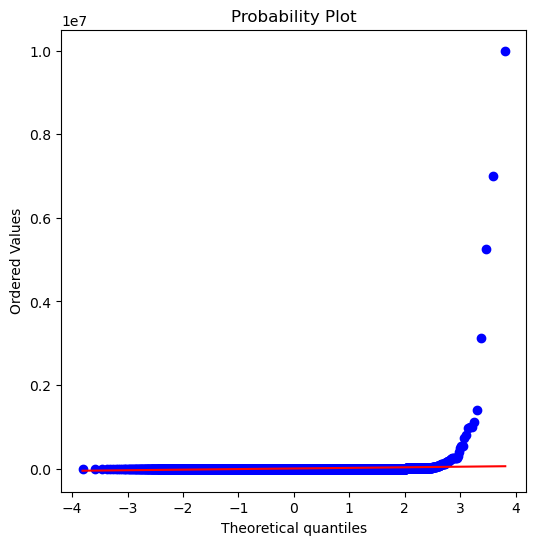

In [81]:
plt.figure(figsize=(6,6))
stats.probplot(old_houses.sample(10000, random_state=42), dist="norm", plot=plt)
plt.show()

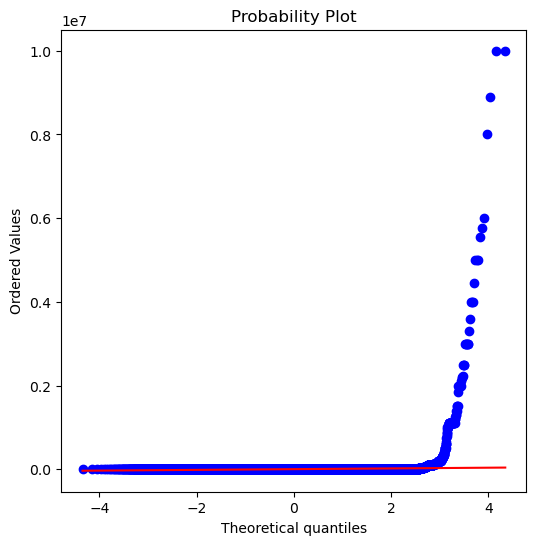

In [85]:
plt.figure(figsize=(6,6))
stats.probplot(new_houses.sample(100000, random_state=42), dist="norm", plot=plt)
plt.show()

In [87]:
u_stat, p_value = stats.mannwhitneyu(old_houses, new_houses, alternative="greater")

In [89]:
u_stat, p_value

(111320228938.0, 4.0243967283360714e-20)

In [91]:
alpha = 0.05
if p_value < alpha:
    print('The H₀ is rejected. Older houses have more area.')
else:
    print('The H₀ is not rejected. There is not enough evidence that older houses are larger.')

The H₀ is rejected. Older houses have more area.
